In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#understanding whether a customer will leave based on their phone plan 
df = pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#defining X and Y variables
df["Churn"] 
df["Churn"] = df["Churn"].map({"Yes":1,"No":0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


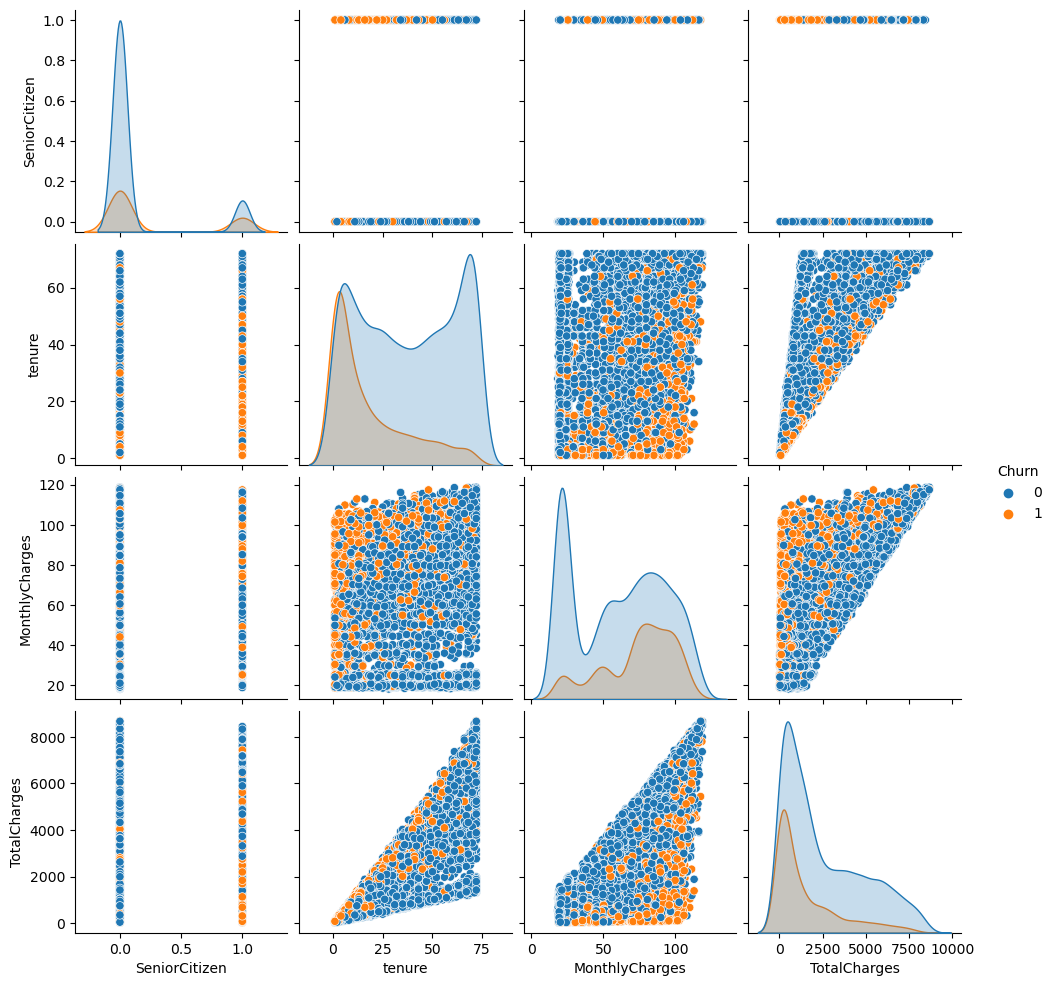

In [6]:
#looking at the spread of data based on parameters
sns.pairplot(df, hue = "Churn" )
plt.show()

In [7]:
#Determining whether any missing data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


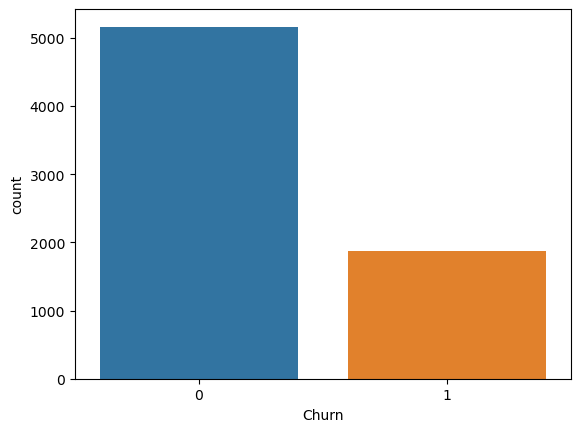

In [8]:
#looking at teh distribution of the data to ensure data is spread 
sns.countplot(df["Churn"])
plt.show()

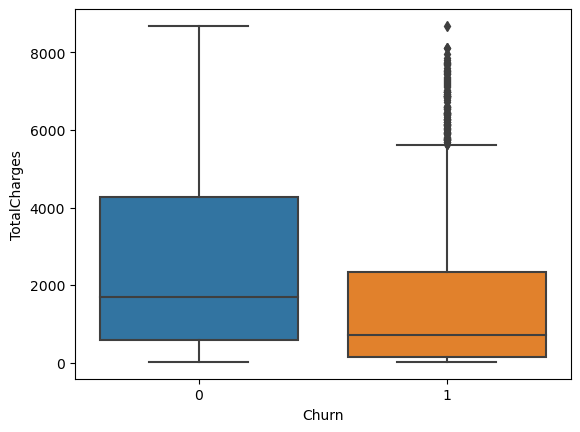

In [9]:
#looking at whether the customer values their monthly charges on whther they chrn 
sns.boxplot(data=df, x = "Churn", y = "TotalCharges")
plt.show()

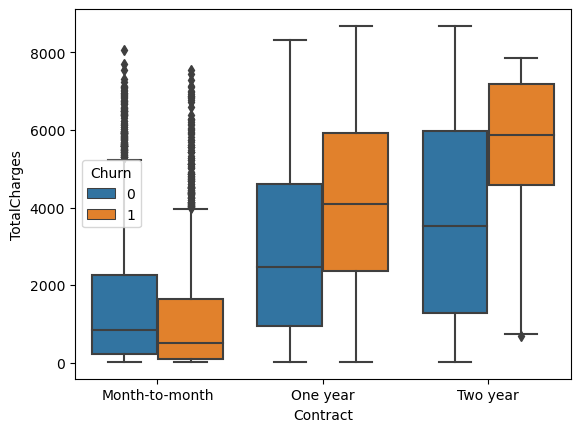

In [10]:
#looking at the distribution of monthly charge by the contract length
sns.boxplot(data=df, x = "Contract", y = "TotalCharges", hue="Churn")
plt.show()

In [11]:
#getting dummy variables for the coloumns that are not number based so that each is replaced by 0 or 1
X = pd.get_dummies(df, columns=["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "InternetService","StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"])

In [12]:
(X.columns)

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',

In [13]:
#looking at the correlation based on each variable
correlation = X.corr("pearson")
correlation

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen_0,-0.015683,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,...,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987
SeniorCitizen_1,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
Partner_No,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-0.016957,0.016957,-1.000000,1.000000,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948


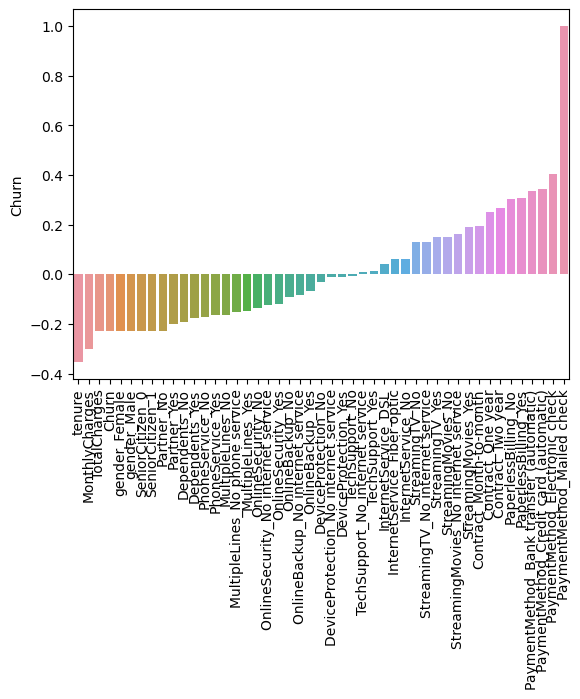

In [14]:
#plotting which variables has the greatest correlation with whether the costumer churns or not
sns.barplot(x =correlation.columns, y=correlation["Churn"].sort_values())
plt.xticks(rotation=90)
plt.show()

In [15]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

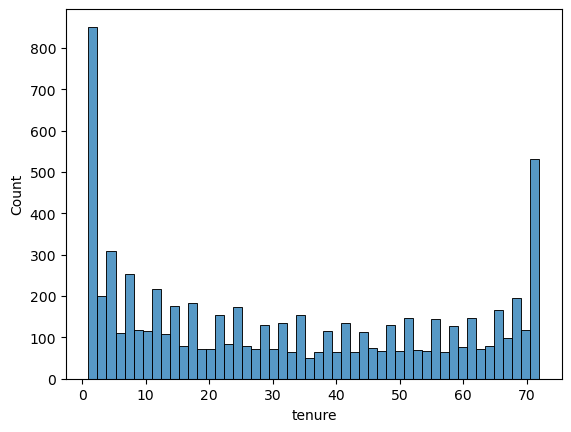

In [16]:
sns.histplot(data=df["tenure"],bins = 50 )
plt.show()

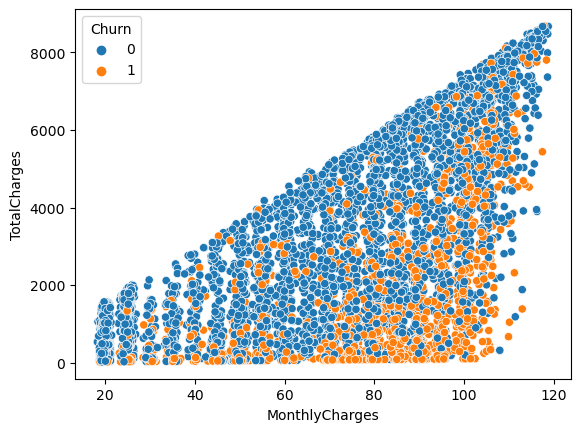

In [17]:
#looks at the monthly charges vs Total charges to see whether if those who have a higher monthly charge will cut the service first
sns.scatterplot(data = df, x ="MonthlyCharges", y = "TotalCharges", hue="Churn" )
plt.show()

In [18]:
churn_rate = pd.DataFrame([X["tenure"],X["Churn"]]).transpose()
churn_rate


,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7027,24,0
7028,72,0
7029,11,0
7030,4,1


In [25]:
#Looks at the length of the contract and the churn based on count
tenures = pd.DataFrame(churn_rate.groupby(["tenure"]).value_counts(),columns=["count"])
tenureid = list()

for i in np.arange(1,73):
    x  = tenures.loc[i]
    y = float((x.loc[1]/(x.loc[1]+x.loc[0]))*100)
    tenureid.append(y)
tenureid
tenures

count
tenure Churn       
1      1        380
       0        233
2      1        123
       0        115
3      0        106
...             ...
70     1         11
71     0        164
       1          6
72     0        356
       1          6

[144 rows x 1 columns]

In [20]:
#find the percentage of individuals that churned based on contract length
v = pd.DataFrame(data = tenureid, columns=["Churn_rate"], index = np.arange(1,73))

In [21]:
v

,Churn_rate
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697
71,3.529412


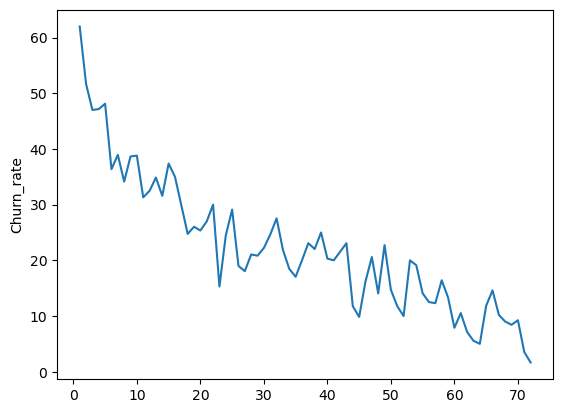

In [22]:
#plots the relationship as a plot
sns.lineplot(y = v["Churn_rate"], x = v.index)
plt.show()

In [23]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
#starts the machine learning process by getting dummy variables of important variables and removes irrelavent variables
X = pd.get_dummies(df.drop(["Churn","customerID"], axis=1))

In [27]:
y = df["Churn"]

In [28]:
#Initialize the test train split to ensure the model is trained against a test set.   
from sklearn.model_selection import train_test_split

In [29]:
#Under normal circumstances the data is split once again or cross validation occurs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.tree import DecisionTreeClassifier   

In [32]:
#ecision Tree Algorithm
model = DecisionTreeClassifier()

In [33]:
#Establashing a Grid search to decide which parameter best describes the relationship
param = {"criterion":["gini","entropy"],
        "max_features": ["sqrt", "log2"],
        "max_depth": [6]}

In [34]:
#Fits the model to the training data, such that relevant stasitics are evaluated
grid = GridSearchCV(model,param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6],
                         'max_features': ['sqrt', 'log2']})

In [35]:
#Algorithm decides these parameters be evaluates the data
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}

In [36]:
#Prediction
preds = grid.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
#Confusion matrix evaluates how many true positives, false positive, true negatives, False Negatives
print(confusion_matrix(y_test,preds))

[[511  46]
 [ 78  69]]


In [39]:
#Evaluates relavant metrics on the performance of the model
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       557
           1       0.60      0.47      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.82       704



In [40]:
#Dtermines which features played an important role in the decision tree algorithm
grid.best_estimator_.feature_importances_

array([4.34513701e-03, 1.85523856e-01, 2.84381154e-02, 3.00453534e-02,
       2.68415551e-03, 6.88143137e-04, 1.59856921e-04, 0.00000000e+00,
       4.91133662e-03, 0.00000000e+00, 1.35890658e-03, 0.00000000e+00,
       3.60048299e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.79110158e-01, 0.00000000e+00, 3.03827135e-02, 0.00000000e+00,
       1.41014890e-02, 6.54415946e-03, 2.80499058e-03, 0.00000000e+00,
       1.36165952e-03, 0.00000000e+00, 0.00000000e+00, 1.60426718e-03,
       0.00000000e+00, 0.00000000e+00, 5.42090114e-03, 5.54947230e-02,
       1.40938438e-03, 1.16399137e-02, 0.00000000e+00, 4.18576116e-04,
       1.07674555e-03, 4.69400348e-02, 3.72212721e-01, 3.68831716e-03,
       0.00000000e+00, 9.64792552e-04, 0.00000000e+00, 3.06910916e-03,
       0.00000000e+00])

In [41]:
imp_feat = pd.DataFrame(data = grid.best_estimator_.feature_importances_, columns=["Feat Importance"], index=[X.columns]).sort_values("Feat Importance")

In [42]:
imp_feat["indexs"] = imp_feat.index.tolist()
imp_feat

,Feat Importance,indexs
PaymentMethod_Mailed check,0.000000,"(PaymentMethod_Mailed check,)"
OnlineBackup_Yes,0.000000,"(OnlineBackup_Yes,)"
TechSupport_No internet service,0.000000,"(TechSupport_No internet service,)"
TechSupport_Yes,0.000000,"(TechSupport_Yes,)"
OnlineSecurity_No internet service,0.000000,"(OnlineSecurity_No internet service,)"
InternetService_No,0.000000,"(InternetService_No,)"
StreamingMovies_No internet service,0.000000,"(StreamingMovies_No internet service,)"
InternetService_DSL,0.000000,"(InternetService_DSL,)"
MultipleLines_Yes,0.000000,"(MultipleLines_Yes,)"
DeviceProtection_No internet service,0.000000,"(DeviceProtection_No internet service,)"


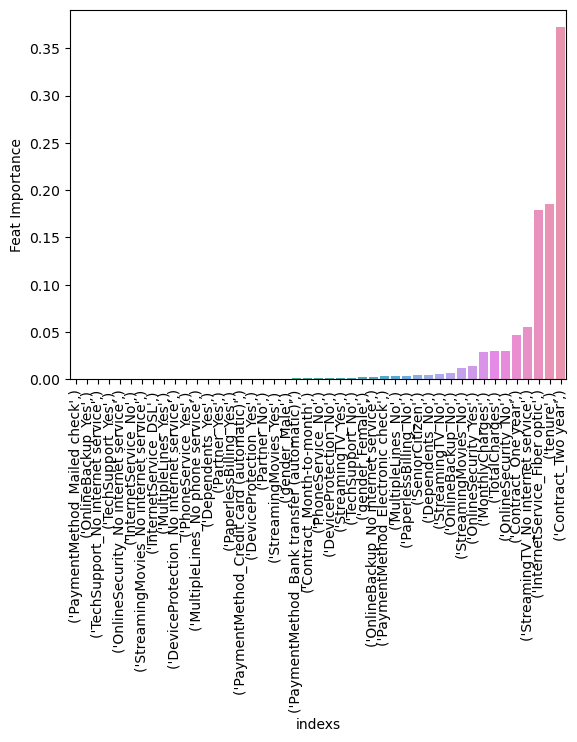

In [43]:
sns.barplot(data= imp_feat, x =imp_feat["indexs"], y=imp_feat["Feat Importance"] )
plt.xticks(rotation=90)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_1 = RandomForestClassifier() 

In [46]:
param = {"max_depth": [1,5,10,15],
        "n_estimators": [5,10,50,100]}
grid_1 = GridSearchCV(model_1,param)
grid_1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'n_estimators': [5, 10, 50, 100]})

In [47]:
grid_1.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [48]:
preds = grid_1.predict(X_test)

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.58      0.52      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.82      0.82      0.82       704

